## OCR with Python - pre-processing techiniques

#### Importing the libraries 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# A customize function for displying Images
def img_display(image, w, h):
    plt.figure(figsize=(w,h))
    plt.imshow(image)
    plt.show()

#### Grayscale

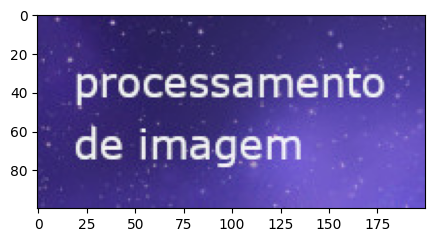

In [4]:
img = cv2.imread('data/images/img-process.jpg')

img_display(img, 5,4)

In [5]:
img.shape

(100, 200, 3)

In [6]:
#To convert rgb to grayscale, we just need to keep the all channel value same.  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('Gray image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#img_display(gray, 5,4)

In [7]:
gray.shape

(100, 200)

#### Thresholding

#### Simple Thresholding

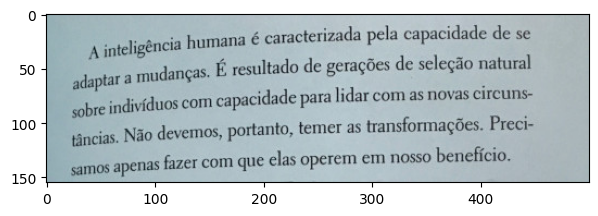

In [12]:
img = cv2.imread('data/images/page-book.jpg')

img_display(img, 7, 5)

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#img_display(gray, 6,4)
cv2.imshow("Gray", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#img_display(thresh, 6,5)
cv2.imshow('Simple Thresholding', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
value

127.0

In [19]:
#Test one 
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

#img_display(thresh, 6,5)
cv2.imshow('Simple Thresholding', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
#Test two
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)

#img_display(thresh, 6,5)
cv2.imshow('Simple Thresholding', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Otsu Method

In [37]:
def img_display2(text, method):
    cv2.imshow("text", method)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [44]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imshow("Otsu Method", otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(value)

138.0


In [45]:
img_display2("Otsu Method", otsu)

In [ ]:
#Try With Another image

In [62]:
img = cv2.imread('data/images/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Simple Threshholding
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
img_display2("Simple Thresholding", thresh)

In [63]:
#Otsu Method
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_display2("Otsu Method", otsu)
print(value)

119.0


#### Adaptive Thresholding

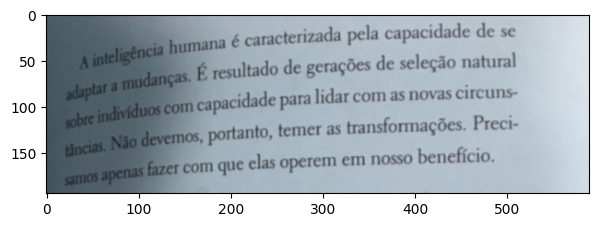

In [68]:
img = cv2.imread('data/images/book02.jpg')

img_display(img, 7,6)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [70]:
# First Apply Otsu Method
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_display2("Otsu Method", otsu)
print(value)

147.0


In [80]:
#Now apply adaptive thresholding (Average calculation)
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
img_display2("Adaptive Thresholding", adaptive_average)

#### Gaussian Adaptive Thresholding 

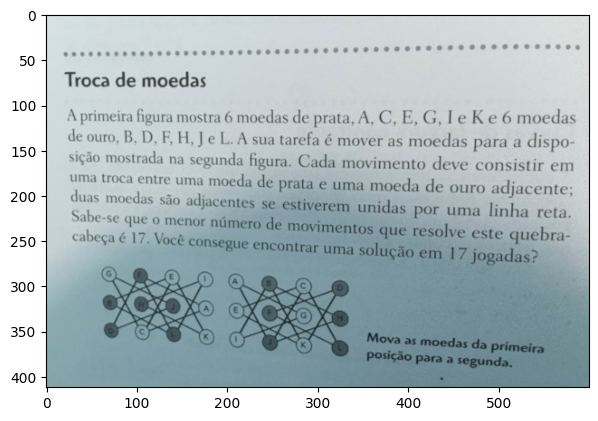

In [93]:
img = cv2.imread('data/images/book_adaptative.jpg')
img_display(img, 7,6)

In [98]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussain = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
img_display2("adaptive_gaussain", adaptive_gaussain)

In [99]:
#Compare with adaptive mean
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
img_display2("adaptive_average", adaptive_average)

#### Color Inversion

In [117]:
img = cv2.imread('data/images/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_display2("Image Gray", gray)

In [103]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [104]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [106]:
# When Working With OCR recommended backgrounds with white color and text with black color
invert = 255-gray
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [107]:
255-68

187

In [112]:
img_display2('Invert Image', invert)

In [113]:
img_display2("Thresh", thresh)

In [115]:
invert = 255-thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)

In [116]:
img_display2('Inverted Image', invert)

#### Resizing
* INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
* INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
* INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results
* INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
* INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

In [119]:
img_display2("Image Resizing", gray)

In [122]:
gray.shape

(100, 200)

In [123]:
# Fx and fy will be same, otherwise Image will be Distorted
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
img_display2("Increased Image", increase)

In [124]:
increase.shape

(150, 300)

In [125]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
img_display2("Decreased Image", decrease)

In [126]:
decrease.shape

(50, 100)

#### Morphological operations

##### Erosion

In [131]:
img = cv2.imread('data/images/text-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_display2('Gray', gray)

In [137]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [142]:
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))
img_display2('Image Erosion', erosion)

#### Dilation

In [144]:
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))
img_display2('Image Dilation', dilation)

#### Opening

In [149]:
erosion = cv2.erode(gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
img_display2("Gray", gray)
img_display2("Erosion", erosion)
img_display2("Oprning", opening)

#### Closing

In [151]:
img = cv2.imread('data/images/text-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_display2("gray", gray)

In [156]:
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
img_display2("Original Gray Image", gray)
img_display2('Dilated Image', dilation)
img_display2("Closing Image", closing)